# Exercise 2

## Q1:
<p>For the IRIS data set write down the meta information.</p>

### About Dataset

#### Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

#### Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

#### About this file
The dataset is a CSV file which contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species)

Both Metadata and the dataset have been sourced from https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [ ]:
# importing all function and libraries that are needed

import pandas as pd  # for reading the datatset and many more operations on th dataset

import numpy as np # for any complex mathematical operation taht may be required

# libraries for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # for splitting the dataset
from sklearn.linear_model import LogisticRegression # One of our models which we will use for this dataset
from sklearn.neighbors import KNeighborsClassifier # Another model which we will use for this dataset
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve # functions for evaluating our models

In [ ]:
df = pd.read_csv('iris.csv', index_col = 'Id')  #loading dataset

In [ ]:
df.head() # printing first 5 rows of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info() # checking for any null values in the data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
df.describe() # describing all attributes in the datset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Q2:
Visualize the class label against the predictor variable using appropriate plots

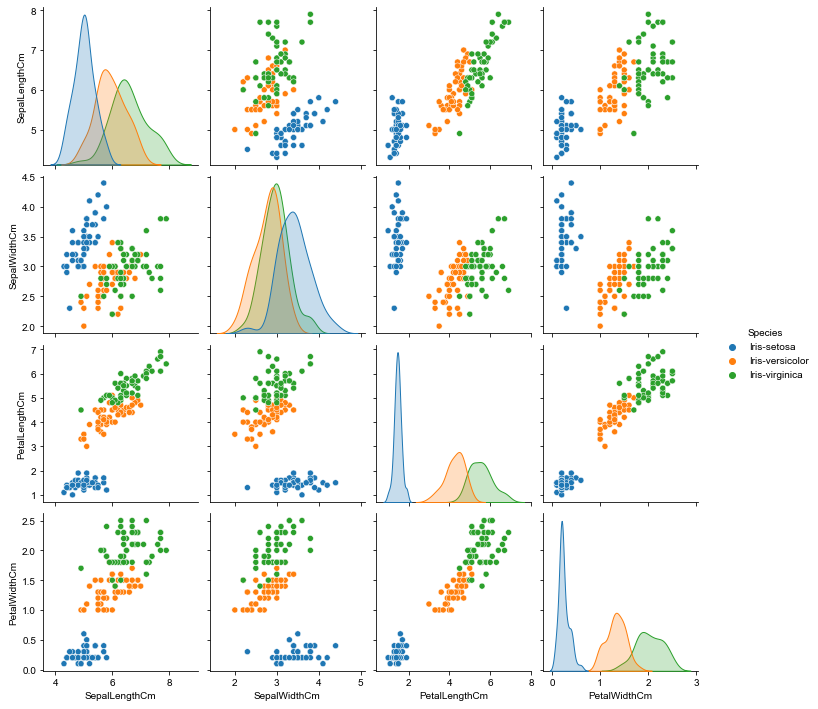

In [ ]:
sns.pairplot(df, hue = 'Species') # pairplot between the predictor variables with classess as hue
sns.set_theme()
plt.show()

From the above pairplot, we find that the species Iris-setosa is separated from the other two very clearly by all of the scatter plots while the boundary between Iris-versicolour and iris virginica is far less clear.

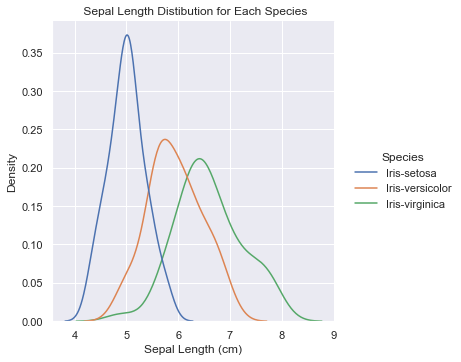

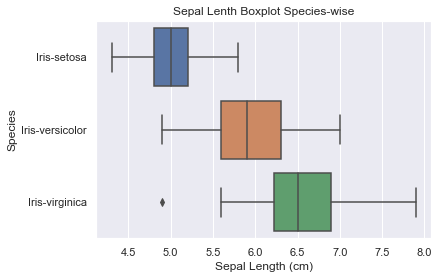

In [ ]:
sns.displot(data = df, x = 'SepalLengthCm', hue = 'Species', kind = 'kde').set(
    title = ' Sepal Length Distibution for Each Species', xlabel = 'Sepal Length (cm)')
plt.show()
sns.boxplot(data = df, y = 'Species', x = 'SepalLengthCm').set(title = 'Sepal Lenth Boxplot Species-wise', 
                                                              xlabel = 'Sepal Length (cm)')
plt.show()

From the above kde and boxplots, we confirm that for Sepal Length and that the distributions of all species are separate from one another. The majority of all datapoints in the 3 species, all fall outside of the range of the other 2 species. This means that Sepal Length is a good predictor variable to separate and identify the 3 species.

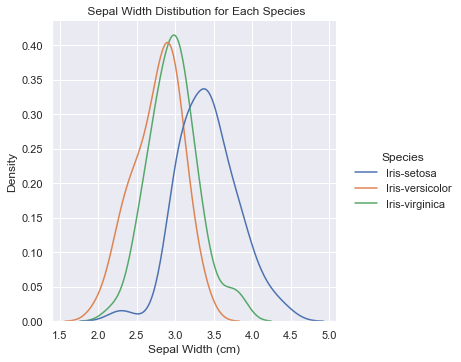

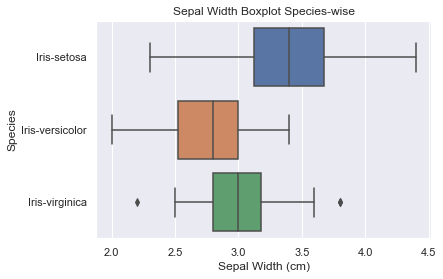

In [ ]:
sns.displot(data = df, x = 'SepalWidthCm', hue = 'Species', kind = 'kde').set(
    title = ' Sepal Width Distibution for Each Species', xlabel = 'Sepal Width (cm)')
plt.show()
sns.boxplot(data = df, y = 'Species', x = 'SepalWidthCm').set(title = 'Sepal Width Boxplot Species-wise', 
                                                              xlabel = 'Sepal Width (cm)')
plt.show()

From the above kde and boxplots, for the predictor variable Sepal Width, we find that Iris-setosa has a clear distinct distibution. However, for Iris-versicolor and Iris-virginica, the distributions overlap. This pattern in the distributions points to the fact that Sepal width will only be good to separate Iris-setosa from either of the other 2 species and that distinguishing between the other 2 using Sepal Width will not yield in any good results.

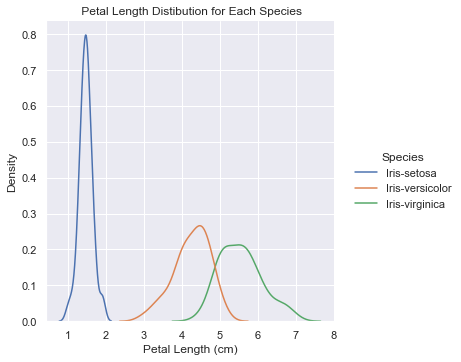

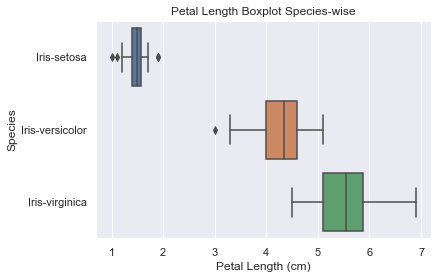

In [ ]:
sns.displot(data = df, x = 'PetalLengthCm', hue = 'Species', kind = 'kde').set(
    title = ' Petal Length Distibution for Each Species', xlabel = 'Petal Length (cm)')
plt.show()
sns.boxplot(data = df, y = 'Species', x = 'PetalLengthCm').set(title = 'Petal Length Boxplot Species-wise', 
                                                              xlabel = 'Petal Length (cm)')
plt.show()

From the above kde and boxplots, it can be confirmed that for Petal Length, the majority of all datapoints in the 3 species, all fall outside of the range of the other 2 species and that the distributions of all species are separate from one another. This means that Petal Length is a good predictor variable to separate and identify the 3 species.

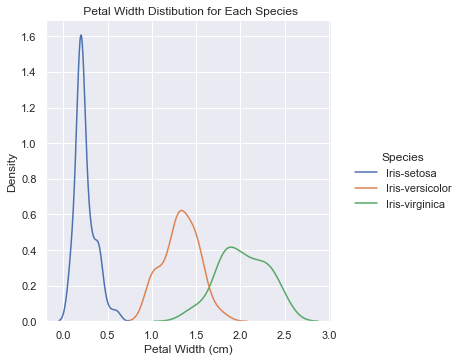

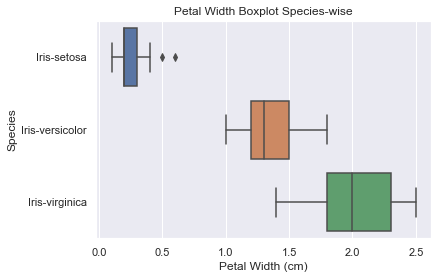

In [ ]:
sns.displot(data = df, x = 'PetalWidthCm', hue = 'Species', kind = 'kde').set(
    title = ' Petal Width Distibution for Each Species', xlabel = 'Petal Width (cm)')
plt.show()
sns.boxplot(data = df, y = 'Species', x = 'PetalWidthCm').set(title = 'Petal Width Boxplot Species-wise', 
                                                              xlabel = 'Petal Width (cm)')
plt.show()

On examining the kde and boxplots, it can be confirmed that for Petal Width, the majority of all datapoints in the 3 species, all fall outside of the range of the other 2 species and that the distributions of all species are separate from one another. This means that Petal Width is a good predictor variable to separate and identify the 3 species.

### Q3:
Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label 
‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # assigning the independent variables

In [ ]:
Y = df['Species'] # assigning the dependent/ target variable

In [ ]:
 # splitting the data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
# creating the Logistic Regression model

# defining the model
# no regularisation
# maximum number of iterations/ epochs = 500
LogReg_model = LogisticRegression(penalty = 'none', max_iter = 500) 

# fitting the model to our dataset
LogReg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=500, penalty='none')

### Q4:
Analysis and visualize the performance of the classifier using metrics, confusion matrix

In [ ]:
test_pred = LogReg_model.predict(X_test) # making predictions on the dataset

In [ ]:
confusion = confusion_matrix(Y_test, test_pred) # creating the confusion matrix for our model

# unpacking the confusion matrix to get the true negative, false positive, true positive and false negative values
((t0, f01, f02), (f10, t1, f12), (f20, f21, t2)) = confusion

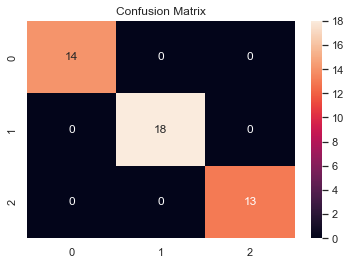

In [ ]:
# visualising the confusion matrix as a heatmap
sns.heatmap(confusion, annot = True).set(title = 'Confusion Matrix') # plotting heatmap
plt.show()

The confusion matrix above clearly displays that the model for the test data has predicted the class labels of all 3 species correctly. This gives the model an accuracy of 100% on the test data. This implies that we can use said model for separating the species very clearly.

### Q5:
Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for 
k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split 
method in sklearn

In [ ]:
# creating the KNeighbors model

# defining the model

KNN = [] # empty list which will house the different KNN models based on k of values 2 - 20

# defining the different models
for i in range(2,21):
    KNN.append(KNeighborsClassifier(n_neighbors = i))
    KNN[i-2].fit(X_train, Y_train) # fitting each model in the list

In [ ]:
KNN_pred = [] # list which will store predictions for each KNeighbors model

for i in range(0,19):
    KNN_pred.append(KNN[i].predict(X_test))

In [ ]:
# printing accuracy for each k values

print("Accuracy of KNeighbors model")
for i in range(len(KNN_pred)):
    acc_model = (Y_test == KNN_pred[i]).sum()/len(Y_test)
    print(f"\t{i+1}. where k = {i+2} : {acc_model:.6f} OR {acc_model * 100:.4f}%")

Accuracy of KNeighbors model
	1. where k = 2 : 0.977778 OR 97.7778%
	2. where k = 3 : 0.977778 OR 97.7778%
	3. where k = 4 : 0.977778 OR 97.7778%
	4. where k = 5 : 0.977778 OR 97.7778%
	5. where k = 6 : 0.977778 OR 97.7778%
	6. where k = 7 : 0.977778 OR 97.7778%
	7. where k = 8 : 0.977778 OR 97.7778%
	8. where k = 9 : 0.977778 OR 97.7778%
	9. where k = 10 : 0.977778 OR 97.7778%
	10. where k = 11 : 0.977778 OR 97.7778%
	11. where k = 12 : 0.977778 OR 97.7778%
	12. where k = 13 : 0.977778 OR 97.7778%
	13. where k = 14 : 0.977778 OR 97.7778%
	14. where k = 15 : 0.977778 OR 97.7778%
	15. where k = 16 : 0.977778 OR 97.7778%
	16. where k = 17 : 0.977778 OR 97.7778%
	17. where k = 18 : 0.977778 OR 97.7778%
	18. where k = 19 : 0.977778 OR 97.7778%
	19. where k = 20 : 0.977778 OR 97.7778%


It is observed that for each value of k we are getting the same accuracy of 97.7778% on the test set. Below we will see the class labels of the datapoints that have been misclassified

In [ ]:
#printing the class labels of missvlassified data points 

for i in range(len(KNN_pred)):
    print(f"for k = {i+2}")
    print(f"The number of misclassified labels = {len(Y_test[Y_test != KNN_pred[i]])}")
    print(f"actual: {Y_test[Y_test != KNN_pred[i]].values}\npredicted:  {KNN_pred[i][Y_test != KNN_pred[i]]}\n")

for k = 2
The number of misclassified labels = 1
actual: ['Iris-virginica']
predicted:  ['Iris-versicolor']

for k = 3
The number of misclassified labels = 1
actual: ['Iris-virginica']
predicted:  ['Iris-versicolor']

for k = 4
The number of misclassified labels = 1
actual: ['Iris-virginica']
predicted:  ['Iris-versicolor']

for k = 5
The number of misclassified labels = 1
actual: ['Iris-virginica']
predicted:  ['Iris-versicolor']

for k = 6
The number of misclassified labels = 1
actual: ['Iris-virginica']
predicted:  ['Iris-versicolor']

for k = 7
The number of misclassified labels = 1
actual: ['Iris-versicolor']
predicted:  ['Iris-virginica']

for k = 8
The number of misclassified labels = 1
actual: ['Iris-versicolor']
predicted:  ['Iris-virginica']

for k = 9
The number of misclassified labels = 1
actual: ['Iris-versicolor']
predicted:  ['Iris-virginica']

for k = 10
The number of misclassified labels = 1
actual: ['Iris-versicolor']
predicted:  ['Iris-virginica']

for k = 11
The num

We see that for each and every value of k, we are getting the same class label as being misclassified which is Iris-versicolor as Iris-virginica. This can be attributed to the fact that the boundary between these 2 species is far less clear and that their distribution slightly overlap in 3 of the kde plot observed above, while in the 4th they completely overlap.

### Q6:
Identify the best k ( for k between 2 and 20) for the model built

In [ ]:
KNN_scores = [] # storing the scores of each model in this list

for i in range(0,19):
    KNN_scores.append(KNN[i].score(X_test, Y_test))

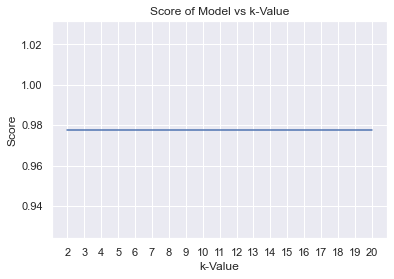

In [ ]:
# plotting scores for each k

sns.lineplot(x = [i for i in range(2,21)], y = KNN_scores).set(title = "Score of Model vs k-Value",
                                                              xlabel = "k-Value", ylabel = "Score") 
plt.xticks([i for i in range(2,21)]) 
plt.show()

In the above Lineplot, the Score of each model for all values of k is the same. Thus we can say that for this dataset, we can take any value of k from 2 to 20

### Q7:
Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better 
performance for the IRIS dataset

On finally comparing the analysis of the two models from above, we find that both do a very good job of separating and distinguishing all 3 classes. However, the logistic regression model had an accuracy of 100% as it had no misclassifications (confirmed from the confusion matrix) while the KNeighbors model had an accuracy of 97.7778% for the same test set and had misclassified 1 data point. The reasons for this have also been discussing above.